In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

df = pd.read_csv("synthetic_dataset.csv")

## Estimación de Parámetros con OLS

In [49]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,4.967142,-1.382643,NaN,15.230299,-2.341534,-2.341370,15.792128,7.674347,-4.694744,5.425600,-4.634177,-4.657298,2.419623,-19.132802,-17.249178,152.273643
1,-5.622875,-10.128311,3.142473,-9.080241,-14.123037,14.656488,-2.257763,NaN,-14.247482,-5.443827,1.109226,-11.509936,3.756980,-6.006387,-2.916937,144.947630
2,-6.017066,18.522782,-0.134972,-10.577109,8.225449,NaN,2.088636,-19.596701,-13.281860,1.968612,7.384666,1.713683,-1.156483,-3.011037,-14.785220,188.449076
3,-7.198442,-4.606388,NaN,3.436183,-17.630402,3.240840,-3.850823,-6.769220,6.116763,10.309995,9.312801,NaN,-3.092124,3.312634,9.755451,107.875692
4,-4.791742,-1.856590,-11.063350,-11.962066,8.125258,13.562400,-0.720101,10.035329,3.616360,-6.451198,3.613956,15.380366,-0.358260,15.646437,-26.197451,-78.724744


In [50]:
print(df.isnull().sum())

X1     205
X2     202
X3     210
X4     222
X5     210
X6     195
X7     185
X8     193
X9     195
X10    195
X11    189
X12    198
X13    211
X14    198
X15    192
Y        0
dtype: int64


In [51]:
total_datos = 4000 
print(f"Total de datos: {total_datos}")

X1 = (205 / total_datos) * 100
X2 = (202 / total_datos) * 100
X3 = (210 / total_datos) * 100
X4 = (222 / total_datos) * 100
X5 = (210 / total_datos) * 100

print(f"El porcentaje que representan de datos nulos en cada una de las categorías son los siguientes:\n"
      f"X1: {X1:.2f}%\n"
      f"X2: {X2:.2f}%\n"
      f"X3: {X3:.2f}%\n"
      f"X4: {X4:.2f}%\n"
      f"X5: {X5:.2f}%\n"
)

Total de datos: 4000
El porcentaje que representan de datos nulos en cada una de las categorías son los siguientes:
X1: 5.12%
X2: 5.05%
X3: 5.25%
X4: 5.55%
X5: 5.25%



## Normalización

In [52]:
numerical_cols = np.array(["X1", "X2", "X3", "X4", "X5"])
for col in numerical_cols:  
    if col in df.columns:  
        stat, p_value = stats.normaltest(df[col].dropna())  
        print(f" {col}: Estadístico = {stat}, p-valor = {p_value}")

        if p_value < 0.05:
            print(" Los datos NO siguen una distribución normal.\n")
        else:
            print(" Los datos siguen una distribución normal.\n")
    else:
        print(f" La columna '{col}' no existe en el DataFrame.\n")

 X1: Estadístico = 3.165120884485229, p-valor = 0.20544838545904986
 Los datos siguen una distribución normal.

 X2: Estadístico = 1.107147111082594, p-valor = 0.5748917277151018
 Los datos siguen una distribución normal.

 X3: Estadístico = 0.8312062793277601, p-valor = 0.6599421233743414
 Los datos siguen una distribución normal.

 X4: Estadístico = 1.0703099682544395, p-valor = 0.5855785277345695
 Los datos siguen una distribución normal.

 X5: Estadístico = 3.4799554217609905, p-valor = 0.17552431285578177
 Los datos siguen una distribución normal.



Si el porcentaje de valores faltantes es 5%, lo ideal es imputarlos en lugar de eliminarlos para no perder información. En este caso, utilizaremos la imputación con la media, ya que es una estrategia efectiva cuando los datos siguen una distribución aproximadamente normal y no presentan valores atípicos significativos.

Para imputar los valores faltantes con la media en un DataFrame de pandas, puedes usar el siguiente código:

In [53]:
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
Y      0
dtype: int64


Text(0.5, 1.0, 'Matriz de Correlación')

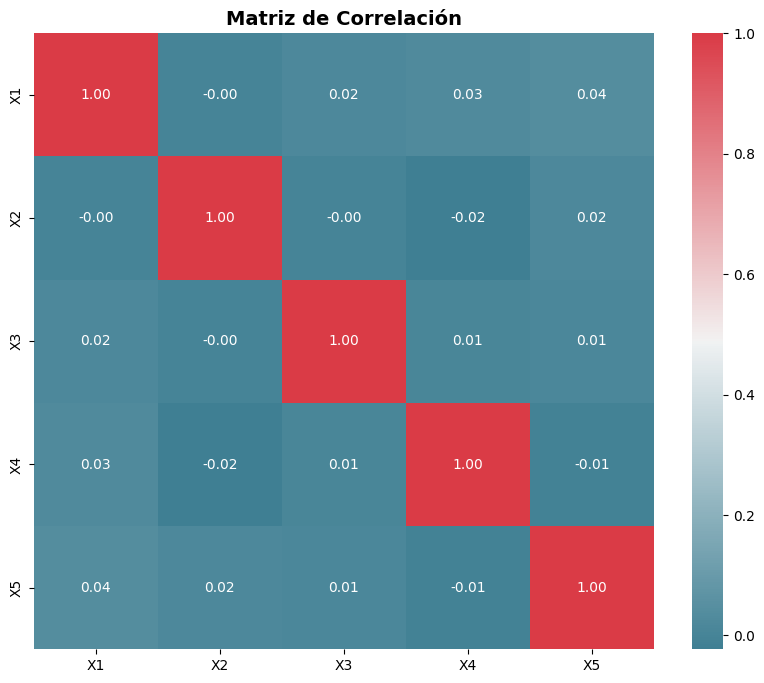

In [54]:
columnas = ['X1', 'X2', 'X3',  'X4','X5' ]

corr_mat = df[columnas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
plt.title("Matriz de Correlación", fontsize=14, fontweight="bold")

## Numpy: Cálculo de los coeficientes usando la fórmula OLS: β = (XᵀX)⁻¹ Xᵀy

Agregar columna de unos para el término independiente (β0)

In [70]:
import numpy as np

X = df[["X1", "X2", "X3", "X4", "X5"]].values
y = df["Y"].values


X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Añade una columna de unos a X
print(X_b)


[[  1.           4.96714153  -1.38264301   0.17416585  15.23029856
   -2.34153375]
 [  1.          -5.62287529 -10.1283112    3.14247333  -9.08024076
  -14.12303701]
 [  1.          -6.01706612  18.52278185  -0.13497225 -10.57710929
    8.22544912]
 ...
 [  1.           7.87651287   2.53753554   3.77975684   0.2359561
   -1.33503315]
 [  1.          19.51254434   3.24704153  19.37021313  -1.25082575
    5.89664406]
 [  1.           7.64050782  -4.95093801  -2.73401072  -2.59206311
    2.74768867]]


Multiplicación de la transpuesta de X por X

In [ ]:

XT_X = X_b.T @ X_b  
print(XT_X)

[[ 4.00000000e+03 -5.98878053e+02 -5.56921563e+02  6.96663386e+02
   1.99398603e+02  2.12449246e+02]
 [-5.98878053e+02  3.96423585e+05 -2.71507934e+02  6.49439923e+03
   1.08638741e+04  1.48834052e+04]
 [-5.56921563e+02 -2.71507934e+02  3.79807773e+05 -1.71674571e+02
  -8.70140047e+03  6.77466785e+03]
 [ 6.96663386e+02  6.49439923e+03 -1.71674571e+02  3.77447396e+05
   3.21250277e+03  4.89694301e+03]
 [ 1.99398603e+02  1.08638741e+04 -8.70140047e+03  3.21250277e+03
   3.75720356e+05 -3.55752193e+03]
 [ 2.12449246e+02  1.48834052e+04  6.77466785e+03  4.89694301e+03
  -3.55752193e+03  3.61252658e+05]]


Inversa de (XᵀX)

In [ ]:
XT_X_inv = np.linalg.inv(XT_X)  
print(XT_X_inv)

[[ 2.50206769e-04  3.95720922e-07  3.66851709e-07 -4.65174637e-07
  -1.33321564e-07 -1.65334627e-07]
 [ 3.95720922e-07  2.52980176e-06  2.54273417e-09 -4.22701788e-08
  -7.39293784e-08 -1.04661852e-07]
 [ 3.66851709e-07  2.54273417e-09  2.63570930e-06  6.02537055e-10
   6.03021741e-08 -4.91629911e-08]
 [-4.65174637e-07 -4.22701788e-08  6.02537055e-10  2.65158814e-06
  -2.15120448e-08 -3.41515476e-08]
 [-1.33321564e-07 -7.39293784e-08  6.03021741e-08 -2.15120448e-08
   2.66561303e-06  2.85352581e-08]
 [-1.65334627e-07 -1.04661852e-07 -4.91629911e-08 -3.41515476e-08
   2.85352581e-08  2.77422088e-06]]


Multiplicación de la transpuesta de X por y

In [67]:
XT_y = X_b.T @ y  
print(XT_y)

[   -1952.94796079 -1198110.37318335  1709672.3711654   1801453.88435047
   160186.07986866 -1179743.59322193]


Cálculo final de los coeficientes

In [69]:
beta = XT_X_inv @ XT_y  

print(f"Coeficientes estimados (β):\n")
print(f"β0 (Intercepto): {beta[0]:.4f}")
print(f"β1 (X1): {beta[1]:.4f}")
print(f"β2 (X2): {beta[2]:.4f}")
print(f"β3 (X3): {beta[3]:.4f}")
print(f"β4 (X4): {beta[4]:.4f}")
print(f"β5 (X5): {beta[5]:.4f}")

Coeficientes estimados (β):

β0 (Intercepto): -0.9999
β1 (X1): -2.9919
β2 (X2): 4.5712
β3 (X3): 4.8661
β4 (X4): 0.5465
β5 (X5): -3.2882


Comprobar modelo obtenido por medio de la libreria (statsmodel)

In [56]:
import statsmodels.api as sm
import pandas as pd

# Suponiendo que tienes un DataFrame llamado df con variables "X" y "y"
X = df[["X1", "X2", "X3", "X4", "X5"]].values  # Variable independiente (predictor)
y = df['Y'].values  # Variable dependiente (objetivo)

# Agregar una constante para el término de intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     535.3
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:13:38   Log-Likelihood:                -23886.
No. Observations:                4000   AIC:                         4.778e+04
Df Residuals:                    3994   BIC:                         4.782e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9999      1.502     -0.666      0.5

##  Estimación de Parámetros con Gradient Descent 

1. Definir las variables y preparar los datos

In [57]:
X = df[["X1", "X2", "X3", "X4", "X5"]].values  # Variables independientes
y = df['Y'].values  # Variable dependiente


2. Agregar la columna de unos para el bias (intercepto)

In [58]:
X = np.c_[np.ones(X.shape[0]), X]  # Agregar columna de 1s


3. Inicializar los coeficientes (θ)

In [59]:
theta = np.zeros(X.shape[1])  


4. Definir los hiperparámetros

In [60]:
alpha = 0.01  # Tasa de aprendizaje
epochs = 1000  # Número de iteraciones


5. Aplicar el Algoritmo de Gradient Descent



In [61]:
m = len(y)  # Número de observaciones

for i in range(epochs):
    y_pred = X.dot(theta)  # Predicción del modelo
    error = y_pred - y  # Diferencia entre predicción y valores reales
    gradient = (1/m) * X.T.dot(error)  # Cálculo del gradiente
    theta -= alpha * gradient  # Actualización de coeficientes


6. Mostrar los coeficientes finales

In [62]:
print(f"Parámetros estimados: {theta}")


Parámetros estimados: [-0.9998126  -2.99192333  4.57118124  4.86614076  0.54650972 -3.28815409]


Utilizando tanto el método de *Mínimos Cuadrados Ordinarios (OLS)* como el *Descenso de Gradiente (Gradient Descent)*, es posible obtener los mismos coeficientes para el modelo de regresión. Mientras que OLS encuentra la solución de manera directa resolviendo ecuaciones matriciales, Gradient Descent optimiza los coeficientes iterativamente minimizando el error. Ambos enfoques, aunque diferentes en su procedimiento, pueden conducir a los mismos valores óptimos para los parámetros del modelo.